# Маркетинговое исследование причин неэффективности привлечения пользователей развлекательного приложения

### 1. Обзор и предобработка данных

In [1]:
# импорт библиотек pandas, numpy, seaborn, matplotlib и stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# отключаем предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# отображение графиков в jupyter'e
%matplotlib inline

# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

# изменение дефолтного размера графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

Изучим данные и выполним предобработку. Проверим, есть ли в данных пропуски и дубликаты. Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратим внимание на столбцы с датой и временем.

In [2]:
# чтение таблиц с данными и сохранение в visits, orders, costs
try:
    visits, orders, costs = (
        pd.read_csv('visits_info_short.csv'),
        pd.read_csv('orders_info_short.csv'),
        pd.read_csv('costs_info_short.csv')
    )
except:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv')
    )

Выведем первые 5 строчек и основную информацию об исследуемых датафреймах.

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Итак, в таблице `visits` 6 столбцов и 309901 строка. Значения представлены в двух видах - `int64` и `object`. Во всех столбцах одинаковое количество значений равное количеству строк, значит пропусков нет. В столбцах `session_start` и `session_end` требуется заменить тип данных на `datetime`. Также, в дальнейшем для удобства приведем названия всех столбцов к нижнему регистру и "змеиному" стилю.

In [5]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В таблице `orders` 3 столбца и 40212 строк. Значения представлены в трех видах - `int64`, `object` и `float64`. Во всех столбцах одинаковое количество значений равное количеству строк, значит пропусков нет. В столбце `Event Dt` требуется заменить тип данных на `datetime`. Также, в дальнейшем для удобства приведем названия всех столбцов к нижнему регистру и "змеиному" стилю.

In [7]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице `costs` 3 столбца и 1800 строк. Значения представлены в двух видах - `object` и `float64`. Во всех столбцах одинаковое количество значений равное количеству строк, значит пропусков нет. В столбце `dt` требуется заменить тип данных на `datetime`. Также, в дальнейшем для удобства приведем названия всех столбцов к нижнему регистру.

#### Приведение названий столбцов к единому стилю

Приведем все названия столбцов в исследуемых таблицах к единому стилю.

In [9]:
# приведение названий столбцов в visits, orders к нижнему регистру и "змеиному" стилю
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

# приведение названий столбцов в costs к нижнему регистру
costs.columns = costs.columns.str.lower()

Проверим, все ли названия столбцов привелись к единому стилю.

In [10]:
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [11]:
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [12]:
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

Названия столбцов во всех таблицах приведены к единому стилю. Можно приступать к необходимому изменению типов данных в столбцах.

#### Изменение типов данных

Приведем столбцы:

- `session_start` и `session_end` из таблицы `visits`,
- `event_dt` из таблицы `orders`,
- `dt` из таблицы `costs`

к новому типу с помощью метода `to_datetime()`.

In [13]:
# обработка столбца session_start в таблице visits
visits['session_start'] = pd.to_datetime(visits['session_start'])
# обработка столбца session_end в таблице visits
visits['session_end'] = pd.to_datetime(visits['session_end'])
# обработка столбца event dt в таблице orders
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
# обработка столбца dt в таблице costs
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#### Удаление дубликатов

Проверим таблицы на наличие дубликатов.

In [14]:
# определение количества явных дубликатов
for i in [visits, orders, costs]:
    print(i.duplicated().sum())

0
0
0


Дубликаты в данных не обнаружены.

#### Вывод

Первичный обзор данных показал, что перед исследованием данные требуют дополнительной подготовки, а именно: 

1. Приведение названий всех столбцов к единому стилю.
2. Изменение типа данных в столбцах с датами.

Пропуски и дубликаты в данных не были обнаружены.

Мы провели предобработку данных:
    
1. Привели названия всех столбцов во всех таблицах к единому стилю.
2. Привели к типу `datetime` столбцы:

    - `session_start` и `session_end` из таблицы `visits`,
    - `event_dt` из таблицы `orders`,
    - `dt` из таблицы `costs`.

Можно приступать к следующему этапу исследования.


### 2. Определение функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.


Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

In [15]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [16]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [17]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [18]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [19]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [20]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1, colormap='rainbow'
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2, colormap='rainbow'
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3, colormap='rainbow')
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4, colormap='rainbow')
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [21]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1, colormap='rainbow')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2, colormap='rainbow')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [22]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1, colormap='rainbow')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2, colormap='rainbow')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3, colormap='rainbow')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4, colormap='rainbow')
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5, colormap='rainbow')
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Все необходимые для дальнейшего анализа функции подготовлены, можно приступать к исследовательскому анализу данных.

### 3. Исследовательский анализ данных

Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [23]:
events = None # других событий нет

# создание пользовательских профилей
profiles = get_profiles(visits, orders, events, ad_costs=costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [24]:
# определение минимальной и максимальной даты привлечения пользователей
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
min_date, max_date

(datetime.date(2019, 5, 1), datetime.date(2019, 10, 27))

Мы получили пользовательские профили, и определили минимальную и максимальную даты привлечения пользователей - 1 мая 2019 года и 27 октября 2019 года соответственно.

Создадим функцию для определения доля платящих пользователей по разным атрибутам (стране, устройствам, каналу привлечения). Для формирования более объективной картины добавим так же столбец с долей платящих пользователей от общей суммы платящих пользователей.

In [25]:
# создание таблицы, отражающей количество пользователей и долю платящих
def share_of_payers(indication):
    ind_profiles = (
    profiles.groupby(by=indication)
            .agg({'user_id':'nunique', 'payer':'sum'})
    )
    ind_profiles['share_%'] = round((ind_profiles['payer'] / ind_profiles['user_id'] * 100) , 2)
    ind_profiles['share_total_%'] = round((ind_profiles['payer'] / ind_profiles['payer'].sum() * 100), 2)
    ind_profiles = ind_profiles.sort_values(by='share_%', ascending=False)
    
    return ind_profiles

Определим, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Для этого построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [26]:
# построение таблицы, отражающей количество пользователей и долю платящих из каждой страны
region_profiles = share_of_payers('region')
region_profiles

,user_id,payer,share_%,share_total_%
region,,,,
United States,100002,6902,6.90,77.72
Germany,14981,616,4.11,6.94
UK,17575,700,3.98,7.88
France,17450,663,3.80,7.47


Исходя из анализа полученной таблицы мы видим, что в приложение приходят пользователи из США, Германии, Великобритании и Франции. Больше всего платящих пользователей и самая большая их доля в США - около 7%. На втором месте платящие пользователи из Германии, на третьем - Великобритания - около 4%. Наименьшая доля платящих пользователей во Франции - 3,8%. При этом, на долю платящих пользователей из США приходится почти 78% от всех платящих пользователей приложения, в то время как на Германию, Великобританию и Францию всего по 7%.

Теперь узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [27]:
# построение таблицы, отражающей количество пользователей и долю платящих для каждого устройства
device_profiles = share_of_payers('device')
device_profiles

,user_id,payer,share_%,share_total_%
device,,,,
Mac,30042,1912,6.36,21.53
iPhone,54479,3382,6.21,38.08
Android,35032,2050,5.85,23.08
PC,30455,1537,5.05,17.31


Мы видим, что приложение доступно для использования на платформах Mac, iPhone, Android и PC. Наибольшая доля - по чуть более 6% платящих пользователей, совершают покупки с apple устройств - Mac и iPhone. Меньше всего доля платящих пользователей на платформе PC - всего 5%. При этом если анализировать общее количество платящих пользователей в приложении, то больше всего покупок было совершено с iPhone - 38%, а на втором месте с Andriod - 23%. Таким образом, мы можем сделать вывод о том, что несмотря на наибольшую долю платящих пользователей с платформы Mac - в абсолютных единицах большинство покупок совершается с мобильных устройств.

Теперь изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Постром таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [28]:
# построение таблицы, отражающей количество пользователей и долю платящих для каждого канала привлечения
channel_profiles = share_of_payers('channel')
channel_profiles

,user_id,payer,share_%,share_total_%
channel,,,,
FaceBoom,29144,3557,12.20,40.05
AdNonSense,3880,440,11.34,4.95
lambdaMediaAds,2149,225,10.47,2.53
TipTop,19561,1878,9.60,21.15
RocketSuperAds,4448,352,7.91,3.96
WahooNetBanner,8553,453,5.30,5.10
YRabbit,4312,165,3.83,1.86
MediaTornado,4364,156,3.57,1.76
LeapBob,8553,262,3.06,2.95


У приложения множество каналов привлечения пользователей:

* Faceboom,
* AdNonSense,
* lambdaMediaAds,
* TipTop,
* RocketSuperAds,
* WahooNetBanner,
* YRabbit,
* MediaTornado,
* LeapBob,
* OppleCreativeMedia,
* organic.

Наибольшая доля платящих пользователей у платформы Faceboom - 12%, на втором месте канал AdNonSense - 11% и на третьем месте канал lambdaMediaAds - 10%. Наименьшая доля платящих пользователей внутри канала у пользователей, пришедших органическим каналом - то есть каналом без привлечения. Тем не менее, если проанализировать общую доля платящих пользователей среди всех, то платящие пользователи органического канала составляют 13%, и находятся на третьем месте, уступив только канала FaceBoom и TipTop.

#### Вывод

Мы получили пользовательские профили, и определили минимальную и максимальную даты привлечения пользователей - 1 мая 2019 года и 27 октября 2019 года соответственно.

Исходя из анализа мы определили, что в приложение приходят пользователи из США, Германии, Великобритании и Франции. Больше всего платящих пользователей и самая большая их доля в США - около 7%. При этом, на долю платящих пользователей из США приходится почти 78% от всех платящих пользователей приложения, в то время как на Германию, Великобританию и Францию всего по 7%.

Мы определили, что приложение доступно для использования на платформах Mac, iPhone, Android и PC. Наибольшая доля - по чуть более 6% платящих пользователей, совершают покупки с apple устройств - Mac и iPhone. Меньше всего доля платящих пользователей на платформе PC - всего 5%. При этом если анализировать общее количество платящих пользователей в приложении, то больше всего покупок было совершено с iPhone - 38%, а на втором месте с Andriod - 23%. Таким образом, мы можем сделать вывод о том, что несмотря на наибольшую долю платящих пользователей с платформы Mac - более половины покупок совершается с мобильных устройств.

У приложения большое множество каналов привлечения пользователей. Наибольшая доля платящих пользователей у платформы Faceboom - 12%, на втором месте канал AdNonSense - 11% и на третьем месте канал lambdaMediaAds - 10%. Наименьшая доля платящих пользователей внутри канала у пользователей, пришедших органическим каналом - то есть каналом без привлечения. Тем не менее, если проанализировать общую доля платящих пользователей среди всех, то платящие пользователи органического канала составляют 13%, и находятся на третьем месте, уступив только канала FaceBoom и TipTop.

Можно переходить к маркетинговому анализу.

### 4. Маркетинговый анализ

Посчитаем общую сумму расходов на маркетинг.

In [29]:
# подсчёт суммы расходов на маркетинг
costs.costs.sum()

105497.30000000002

Общая сумма расходов на маркетинг за анализируемый период составила 105497 долларов. Рассмотрим структуру затрат по рекламным источникам.

In [30]:
# расчёт структуры затрат по рекламным источникам
costs_structure = costs.groupby('channel').agg({'costs':'sum'})
costs_structure['share_%'] = round((costs_structure['costs'] / costs_structure['costs'].sum() * 100), 2)
costs_structure = costs_structure.sort_values(by='share_%', ascending=False)
costs_structure

,costs,share_%
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


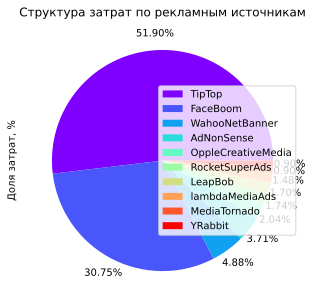

In [31]:
# построение круговой диаграммы для визуализации структуры затрат по рекламным источникам
costs_structure['share_%'].plot(kind='pie',  
                           colormap='rainbow', 
                           labeldistance=None, 
                           legend=True, 
                           autopct='%.2f%%', 
                           pctdistance=1.15)
plt.title('Структура затрат по рекламным источникам')
plt.legend(loc='center right')
plt.ylabel('Доля затрат, %')
plt.show()
None

Итак, мы видим, что более половины затрат на маркетинг составляют затраты на привлечение пользователей через канал TipTop. На втором месте затраты на привлечение пользователей через канал FaceBoom - почти 31% в общей структуре затрат на маркетинг. На остальные каналы затрачивается менее 5% от общей структуры, поэтому мы можем сделать вывод о том, что TipTop и FaceBoom являются основными каналами привлечения пользователей. 

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику для того, чтобы более наглядно оценить ее.

In [32]:
# подготовим данные для построения визуализации динамики, вычленим из даты затрат недели и месяцы
costs['month'] = pd.DatetimeIndex(costs['dt']).month
costs['week'] = pd.DatetimeIndex(costs['dt']).week
costs

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,10,43
1796,2019-10-24,lambdaMediaAds,6.4,10,43
1797,2019-10-25,lambdaMediaAds,8.8,10,43
1798,2019-10-26,lambdaMediaAds,8.8,10,43


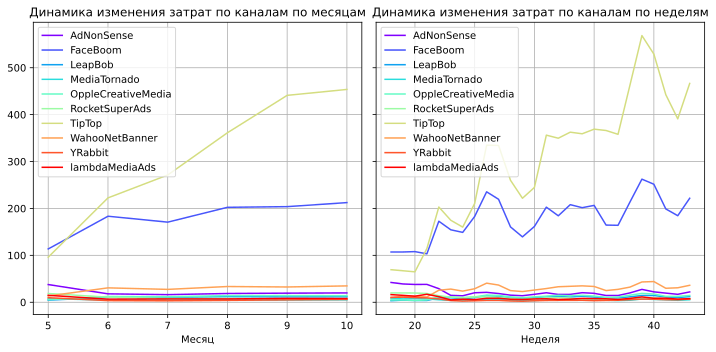

In [33]:
# построение графиков динамики изменения расходов во времени по неделям и месяцам
# первый график - по месяцам
ax1 = plt.subplot(1, 2, 1)
costs_month = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='mean')
costs_month.plot(grid=True,
                 ax=ax1,
                 colormap='rainbow')
plt.legend()
plt.xlabel('Месяц')
plt.title('Динамика изменения затрат по каналам по месяцам')

# второй график - по неделям
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
costs_week = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='mean')
costs_week.plot(grid=True,
                ax=ax2,
                colormap='rainbow')
plt.tight_layout()
plt.legend()
plt.xlabel('Неделя')
plt.title('Динамика изменения затрат по каналам по неделям')
plt.show()

Мы видим, что графики динамики изменения затрат на маркетинг по месяцам и неделям показывают схожую тенденцию, значит построены правильно. 

При этом мы можем отметить, что в начале исследуемого периода затраты на привлечение пользователей через канал TipTop были на втором месте, однако уже примерно на 21 неделе сравнялись с затратами в канале Faceboom, а затем продолжили кратный рост. В итоге за весь исследуемый период затраты на привлечение пользователей через канал TipTop выросли более, чем в 4 раза, через канал FaceBoom - в 2 раза. Затраты на маркетинг в других каналах держались приблизительно на одном уровне весь исследуемый период.

Определим, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Для этого используем профили пользователей.

In [34]:
# определение CAC каждого источника привлечения
profiles.query('channel != "organic"').groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [35]:
# определение среднего CAC на одного пользователя для всего проекта
profiles.query('channel != "organic"').acquisition_cost.mean()

1.127481323942928

Из таблицы мы видим, что максимальный показатель CAC у канала TipTop - 2.8 доллара. На втором месте идет канал FaceBoom, показатель CAC которого равен 1.1 доллара. На третьем месте от FaceBoom недалеко отстает канал AdNonSense - 1 доллар. 

При этом среднее значение CAC на одного пользователя для всего проекта составляет 1.1 доллара, соответственно у самого топового канала CAC превышает общий средний более, чем в два раза.

#### Вывод

Мы провели анализ затрат на маркетинг и определили, что общая сумма расходов на маркетинг за анализируемый период составила 105497 долларов. 

При этом более половины затрат на маркетинг составляют затраты на привлечение пользователей через канал TipTop. На втором месте затраты на привлечение пользователей через канал FaceBoom - почти 31% в общей структуре затрат на маркетинг. На остальные каналы по отдельности затрачивается менее 5% от общей структуры.

Отдельно можно отметить, что в начале исследуемого периода затраты на привлечение пользователей через канал TipTop были на втором месте, однако уже примерно на 21 неделе сравнялись с затратами в канале Faceboom, а затем продолжили кратный рост. В итоге за весь исследуемый период затраты на привлечение пользователей через канал TipTop выросли более, чем в 4 раза, через канал FaceBoom - в 2 раза. Затраты на маркетинг в других каналах держались приблизительно на одном уровне весь исследуемый период.

Мы определили сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Максимальный показатель CAC у канала TipTop - 2.8 доллара. На втором месте идет канал FaceBoom, показатель CAC которого равен 1.1 доллара. На третьем месте от FaceBoom недалеко отстает канал AdNonSense - 1 доллар. При этом среднее значение CAC на одного пользователя для всего проекта составляет 1.1 долларов, соответственно у самого топового канала CAC превышает общий средний более, чем в два раза.

Таким образом, мы видим, что самые затратными и основными каналами привлечения пользователей являются TipTop и Faceboom, на их долю приходится более 80% затрат на маркетинг. При этом, как мы узнали из предыдущего пункта, у пользователей, пришедших из самого затратного канала TipTop довольно низкая доля платящих пользователей - всего 9.6%, в то время как у канала FaceBoom - наибольшая доля платящих пользователей при средней САС в два раза меньше, чем у TipTop. Для того, чтобы сделать аргументированные выводы, приступим к оценке окупаемости рекламы, в которой будем учитывать этот момент.

### 5. Оценка окупаемости рекламы

Проанализируем окупаемость рекламы, конверсию и удержание пользователей. 

Момент анализа - 1 ноября 2019 года, горизонт анализа - 14 дней. 

Из расчетов нам следует исключить пользователей с органическим трафиком, поскольку мы за них ничего не платим. Всю оценку окупаемости рекламы для привлечения пользователей, рассчитываем по пользователям, пришедшим с платныx рекламныx каналов.

In [36]:
# определение момента и горизонта анализа данных
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14 

In [37]:
# фильтрация значений в таблице profiles 
profiles = profiles.query('channel != "organic"')

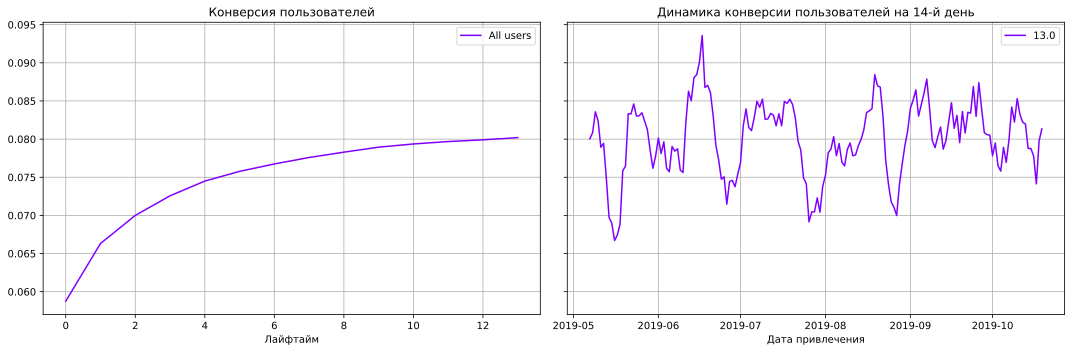

In [38]:
# подсчет conversion
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)
# визуализация конверсии и динамики её изменения
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графику, общая конверсия стабильно растет, значит вычисления произведены правильно. А также, мы можем отметить хороший рост конверсии пользователей на 14 день в июне. 

Рассмотрим конверсию и ее динамику в разрезе по платформе, странам и каналам, чтобы анализ был более объективным.

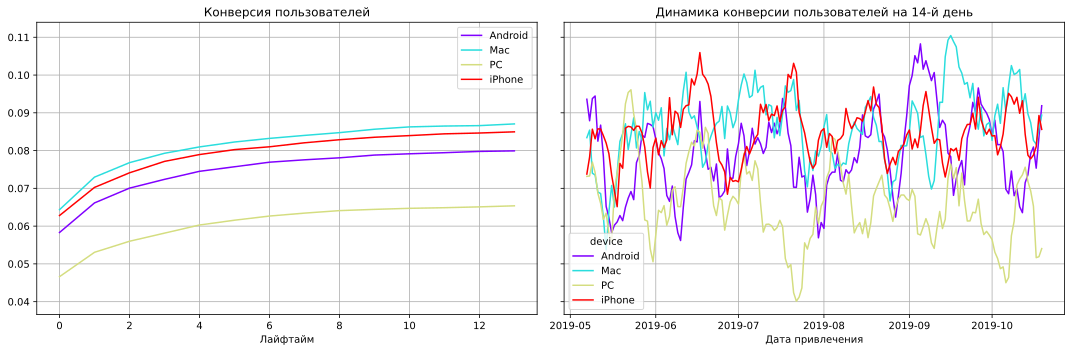

In [39]:
# расчёт конверсии с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# визуализация конверсии с разбивкой по устройствам и динамики её изменения
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

На графиках мы можем отметить, что наибольшая конверсии по платформам у пользователей Mac и iPhone, затем немного отстаёт Android. Наименьшая конверсия у пользователей с платформы PC.

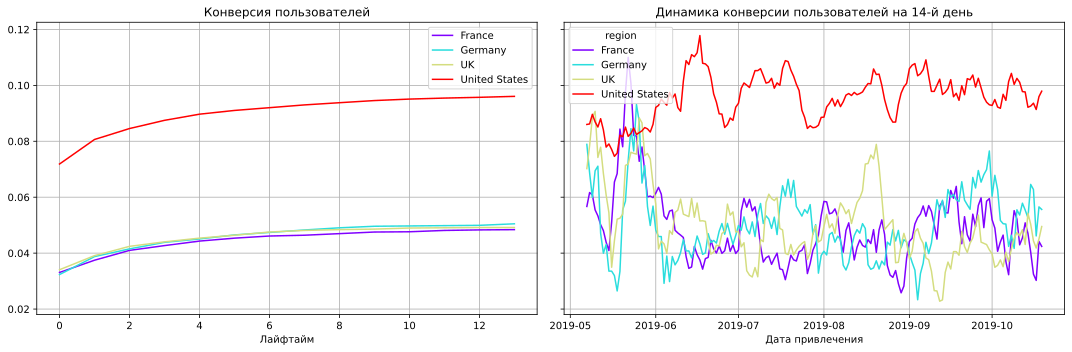

In [40]:
# расчёт конверсии с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# визуализация конверсии с разбивкой по странам и динамики её изменения
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

На протяжении всего исследуемого периода наибольшая конверсия прослеживается у пользователей из США - значение стремится к 10%. В то время как у пользователей из других стран конверсия держится около значения 5%.

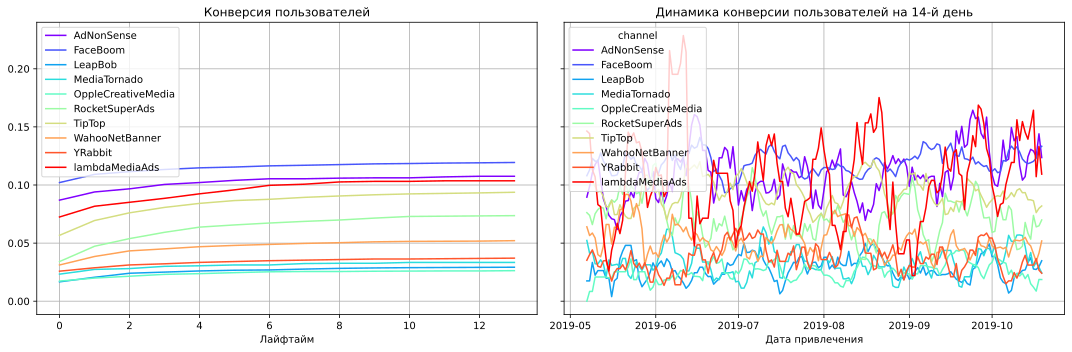

In [41]:
# расчёт конверсии с разбивкой по каналам привлечения пользователей
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# визуализация конверсии с разбивкой по каналам привлечения пользователей и динамики её изменения
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Наибольшая конверсия наблюдается у канала привлечения Faceboom, AdNonSense и lambdaMediaAds - более 10%. У не менее популярного канала TipTop значение конверсии чуть ниже и не достигает 10%. 

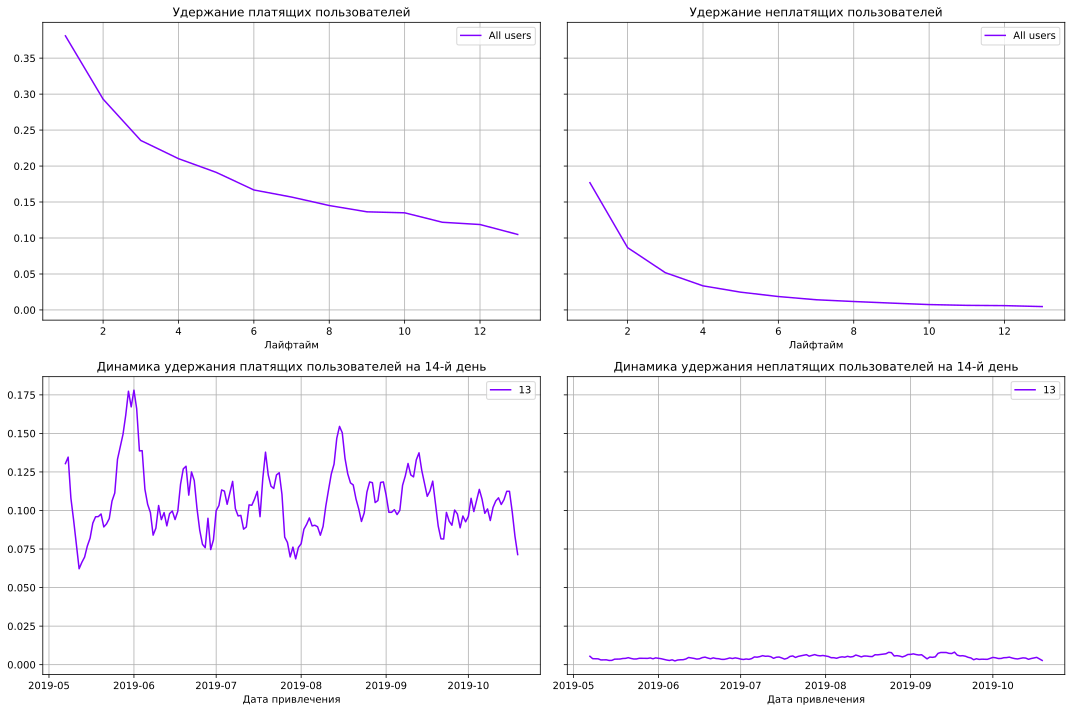

In [42]:
# подсчет retention
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)
# визуализация удержания и динамики его изменения
plot_retention(retention_grouped, retention_history, horizon_days) 

Кривая платящих пользователей находится выше кривой неплатящих пользователей, а форма распределений близка к обратно-экспоненциальной, значит расчёты проведены верно.

Динамика удержания платящих пользователей на 14 день имеет тенденцию к небольшому снижению с показателя 0.175 на максимуме в июне до показателя 0.075 в октябре. 

Таким образом мы может отметить в июне рост конверсии, а так же максимальный показатель удержания пользователей. 

Рассмотрим удержание и динамику в разрезе по платформе, странам и каналам, чтобы анализ был более объективным.

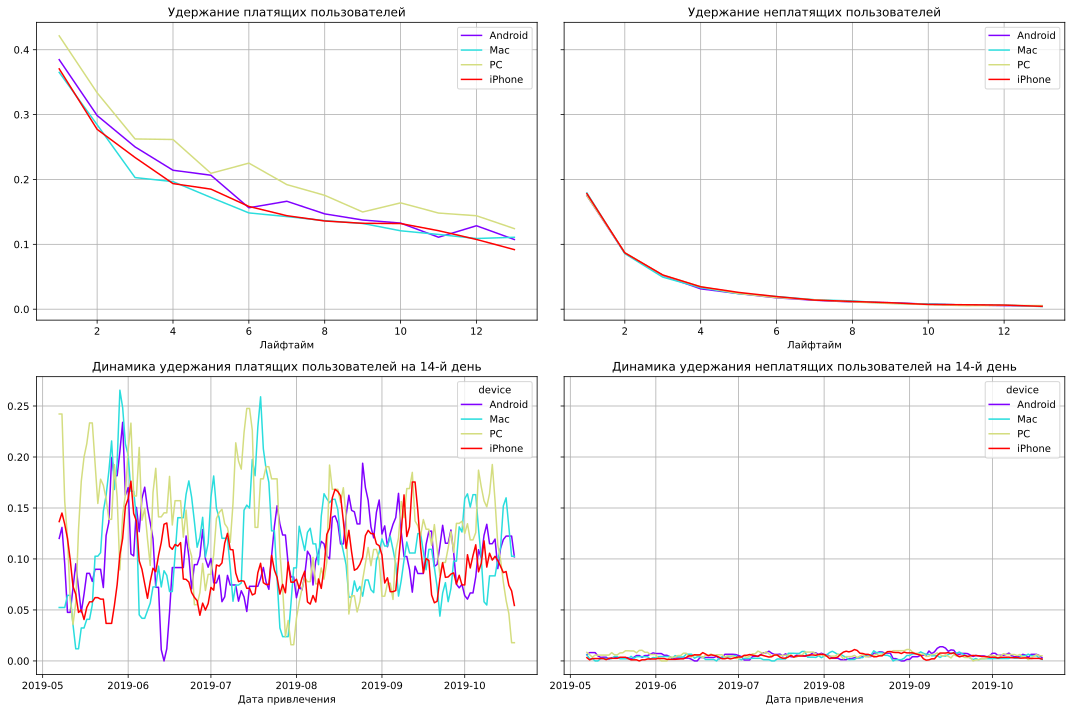

In [43]:
# подсчёт удержания с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
# визуализация удержания с разбивкой по устройствам и динамики его изменения
plot_retention(retention_grouped, retention_history, horizon_days) 

На графиках мы видим, что самый высокий процент удержания пользователей по платформам у пользователей PC, в то время как самый низкий процент удержания у пользователей iPhone, что необычно, так как конверсия у пользователей PC - самая низкая. При этом в июле можно отметить пик показателей удержания пользователей на 14 день у пользователей PC и Mac. 

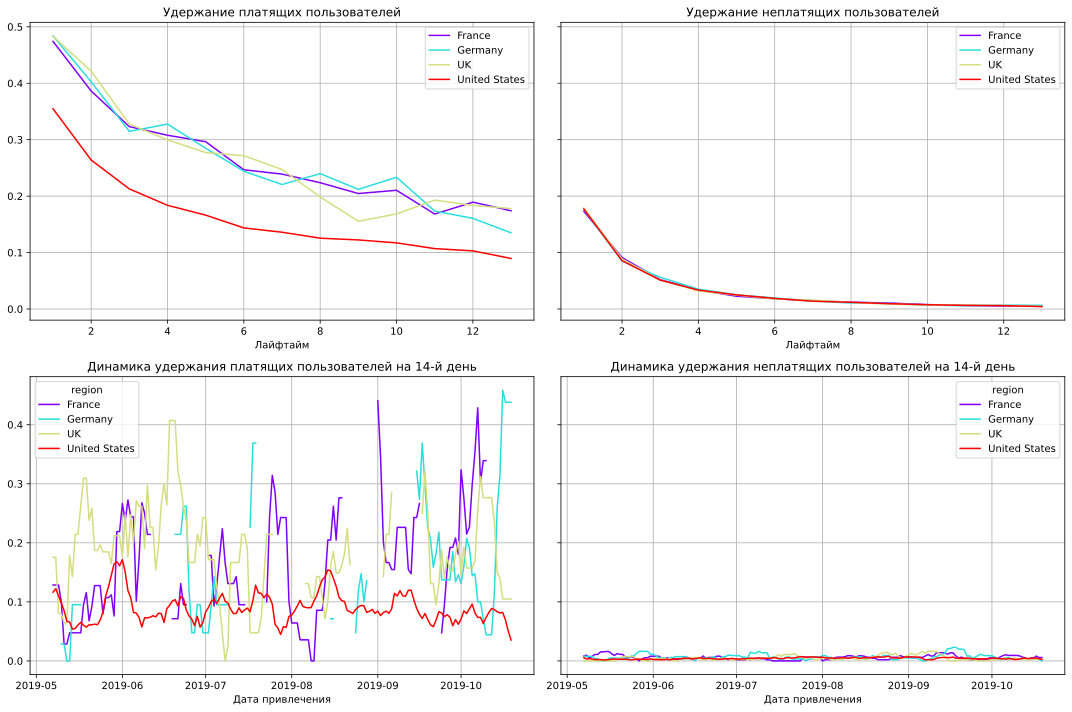

In [44]:
# подсчёт удержания с разбивкой по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
# визуализация удержания с разбивкой по странам и динамики его изменения
plot_retention(retention_grouped, retention_history, horizon_days) 

Мы видим интересную закономерность, что у пользователей из региона с самой большой конверсией (США) - самое низкое удержание. При этом, если внимательно изучить график динамики удержания платящих пользователей на 14-й день, то можно увидеть, что несмотря на то, что у пользователей из США уровень удержания в большинстве своем ниже, чем у пользователей из остальных стран, только эта линия неперерывная. Графики динамики удержания платящих пользователей на 14 день из других стран прерываются, что говорит о непостоянстве данного показателя во Франции, Германии и Великобритании. 

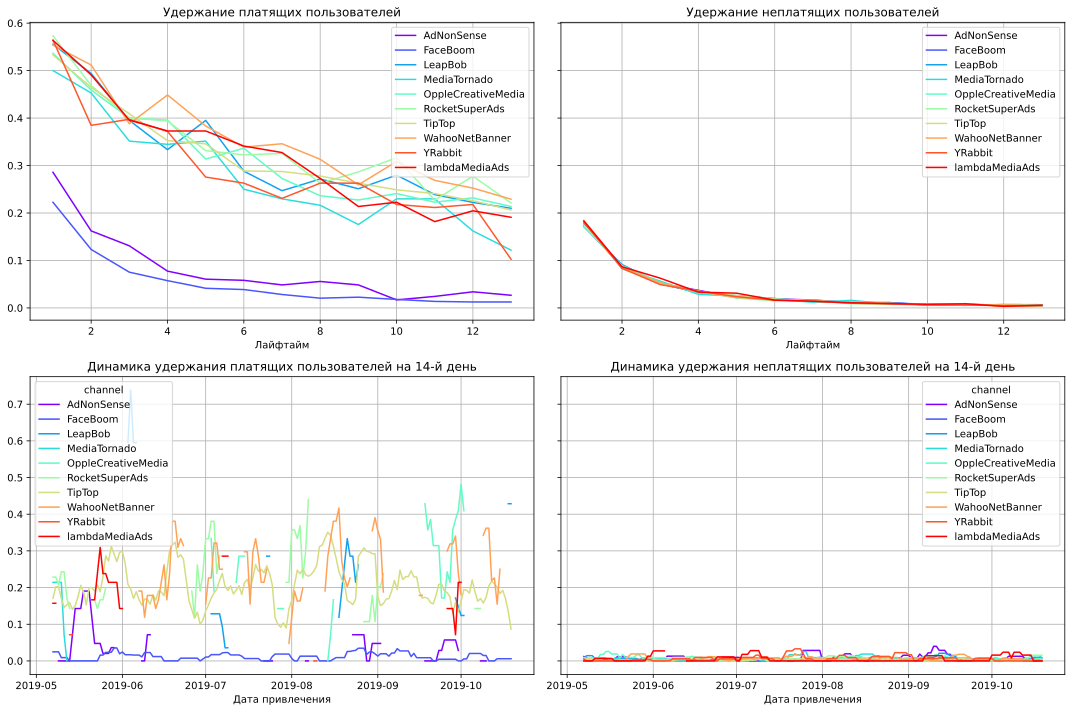

In [45]:
# подсчёт удержания с разбивкой по каналам привлечения пользователей
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
# визуализация удержания с разбивкой по каналам привлечения пользователей и динамики его изменения
plot_retention(retention_grouped, retention_history, horizon_days)

На графике сразу бросается в глаза то, что у каналов с наибольшей конверсией FaceBoom и AdNonSense, так же как и в случае с регионом, наблюдается наименьшее удержание. При этом у канала TipTop с удержанием ситуация чуть получше.

Посмотрим на то, как менялась LTV, CAC и ROI.

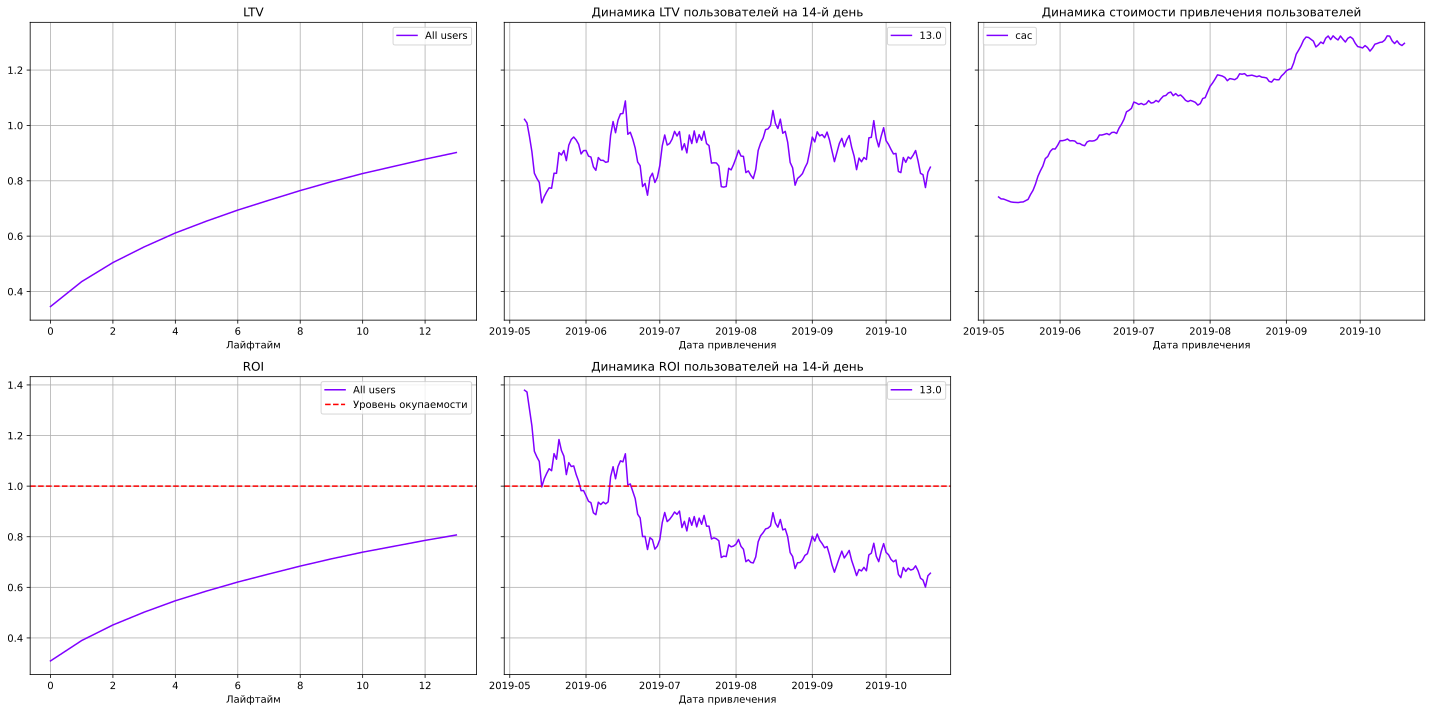

In [46]:
# подсчёт LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, ignore_horizon=False
)
# построение графиков LTV, ROI и CAC
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

LTV стабильно растет вверх, значит расчёты проведены правильно. 

Динамика LTV пользователей на 14 день довольно стабильна и колеблется в пределах значений от 0.7 доллара до 1.1 доллара.

График ROI не достигает уровня окупаемости. При этом мы видим, что инвестиции окупались на 14 день в мае и июне, затем график динамики окупаемости пользователей начал снижаться и перестал окупаться. 

Также мы можем отметить резкий рост значения CAC к началу июня и дальнейшее его продолжение в течение всего исследуемого периода. Учитывая, что LTV достигло значения 0.8 доллара только в сентябре, а CAC еще в мае, это и вызвало снижание окупаемости ниже единицы. При этом, как мы отметили выше - конверсия и удержание так же были на пиках в июне. 

Рассмотрим окупаемость рекламы с разбивкой по устройствам, каналам и странам, для того, чтобы определить причину её снижения.

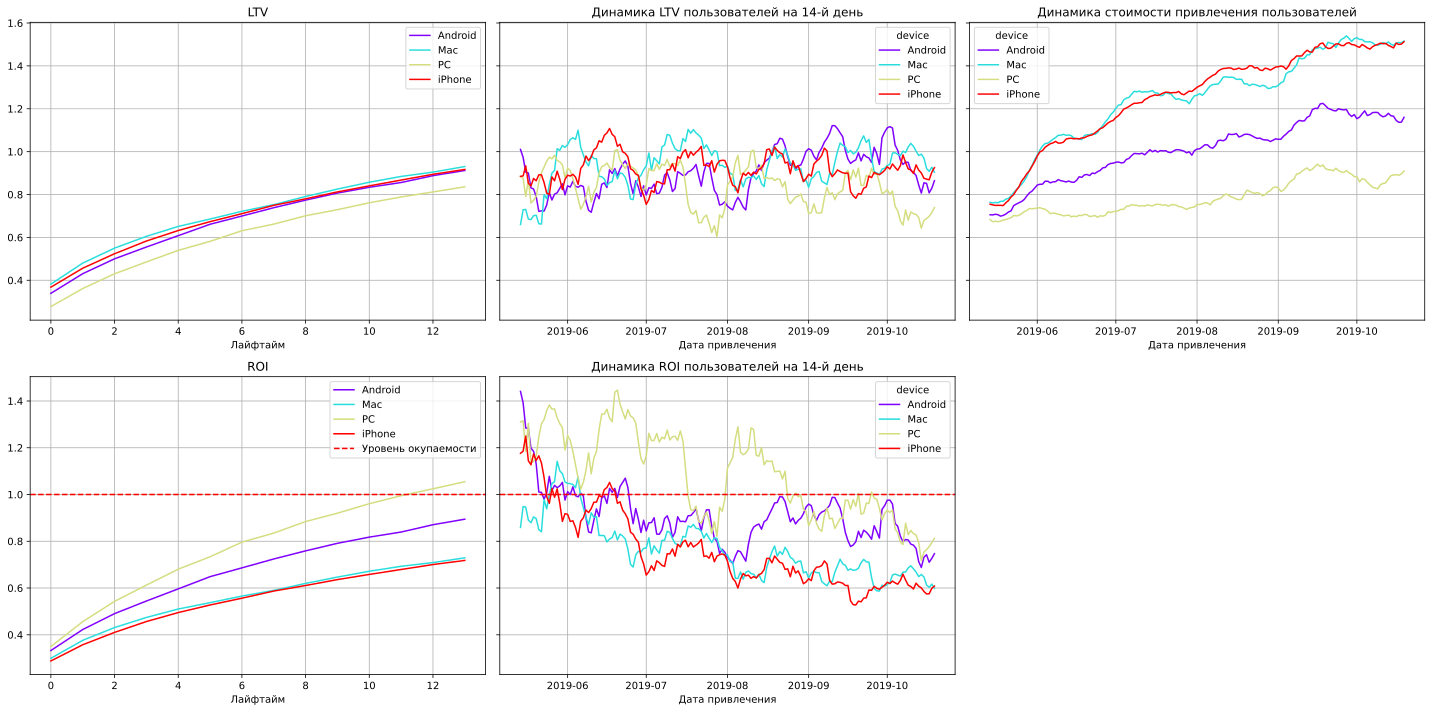

In [47]:
# подсчёт LTV и ROI с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions, ignore_horizon=False
)
# построение графиков LTV, ROI и CAC
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

LTV пользователей всех девайсов стабильно растет. Можно отметить только то, что значение LTV платформы PC на протяжении всего исследуемого периода заметно ниже значения LTV других платформ.

Динамика LTV пользователей различных девайсов на 14 день довольно стабильна и колеблется в едином диапазоне.

При этом в начале исследуемого периода стоимость привлечения пользователей разных девайсов отличалась незначительно. Затем был период роста CAC по всем платформам, и в итоге к концу исследуемого периода CAC пользователей девайсов компании Apple выросла приблизительно в два раза, пользователей Android - приблизительно в полтора раза, а пользователей PC выросла незначительно, что и повлияло на уровень окупаемости рекламы у пользователей разных платформ. Так, реклама окупается только у пользователей PC.

При этом как и в общей тенденции - график динамики ROI пользователей на 14-й день планомерно снижается на протяжении всего исследуемого периода у всех девайсов.

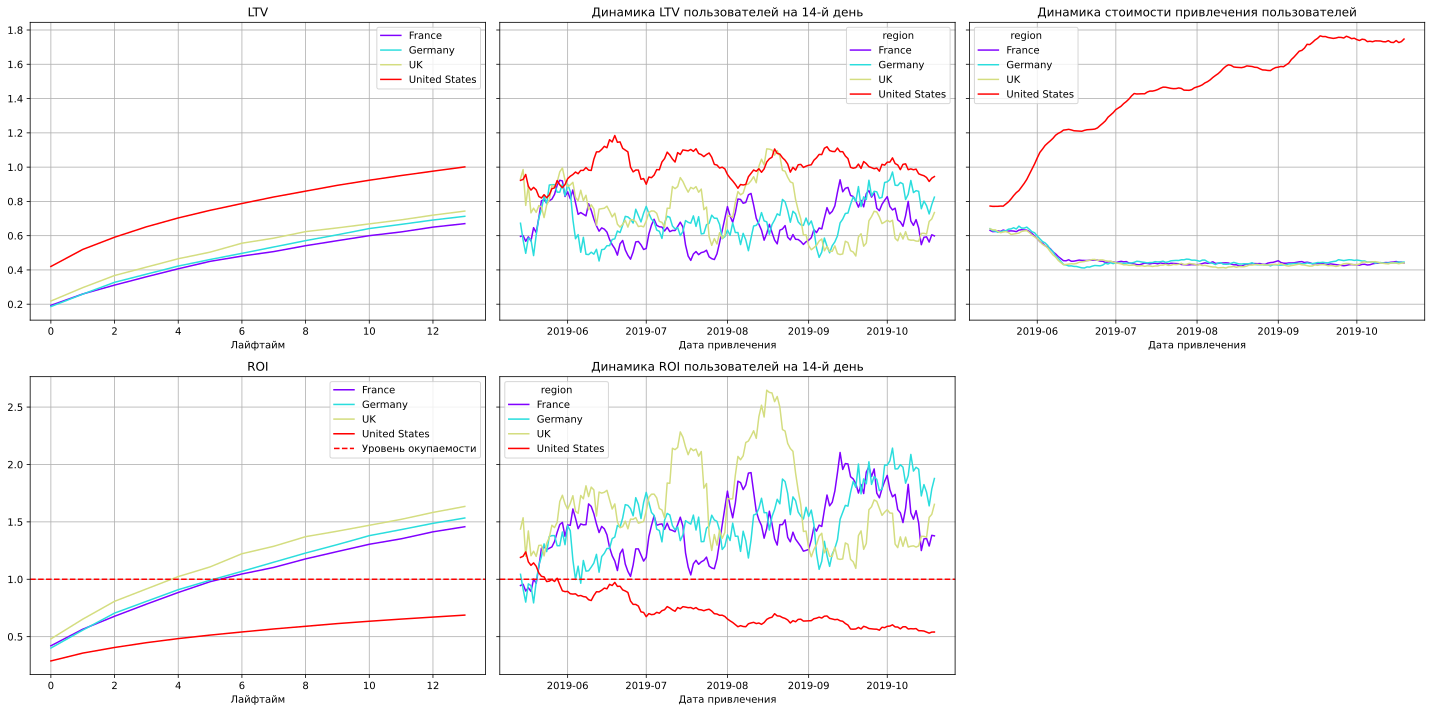

In [48]:
# подсчёт LTV и ROI с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions, ignore_horizon=False
)
# построение графиков LTV, ROI и CAC
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

LTV пользователей из всех стран стабильно растет. Значение LTV пользователей из США на протяжении всего исследуемого периода заметно выше значений LTV пользователей из других стран. Значение LTV пользователей из Франции - наименьшее.

Динамика LTV пользователей из всех стран на 14 день довольно стабильна и колеблется в едином диапазоне.

На графике динамики стоимости привлечения покупателей мы видим кратный рост стоимости привлечения пользователей из США, в то время как стоимость привлечения пользователей из других стран снизилась в июне и держалась на уровне около 0.4 доллара, в то время как к концу исследуемого периода значение CAC пользователей из США достигает стоимости почти 1.8 доллара, что также как и в случае с различными платформами негативно влияет на окупаемость привлечения пользователей из США. В то время как ROI пользователей всех стран пересекает уровень окупаемости на 4-5 дни лайфтайма, ROI пользователей из США не достигает единицы совсем.

При этом в мае и июне ROI пользователей из США на 14 день еще был больше единицы, но в июне начал снижение. Таким образом, мы можем сделать вывод о том, что отрицательное влияние на окупаемость рекламы в компании имеет окупаемость рекламы в США, которая тянет общую окупаемость вниз, начиная с июня, когда резко выросла стоимость привлечения одного пользователя.

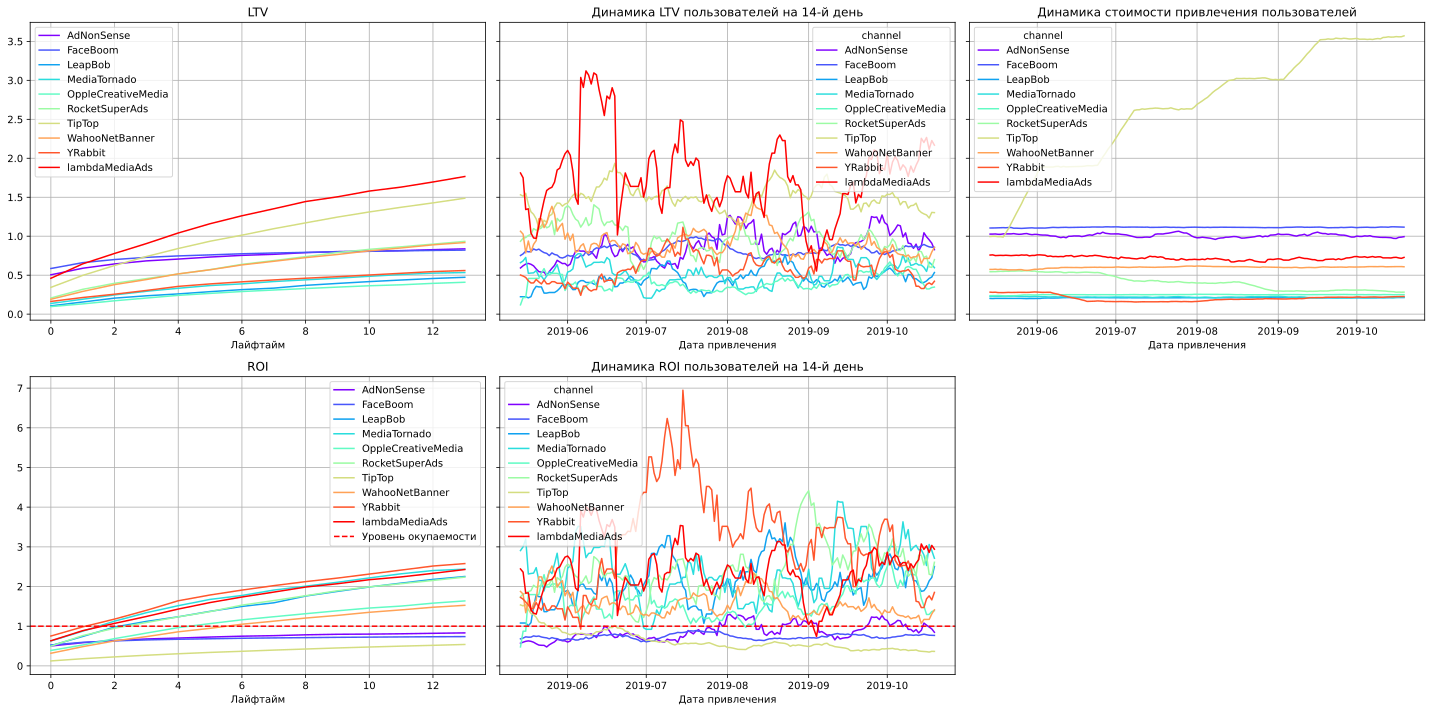

In [49]:
# подсчёт LTV и ROI с разбивкой по каналам привлечения
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions, ignore_horizon=False
)
# построение графиков LTV, ROI и CAC
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

In [50]:
# просмотр LTV
ltv_grouped.sort_values(by=13, ascending=False)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
lambdaMediaAds,2056,0.460268,0.645302,0.778789,0.905540,1.041503,1.160433,1.262369,1.352169,1.444888,1.505564,1.579348,1.630316,1.695861,1.766250
TipTop,18498,0.343550,0.497389,0.624141,0.739834,0.842358,0.935707,1.013676,1.096450,1.171400,1.245485,1.311417,1.371467,1.427640,1.487908
RocketSuperAds,4251,0.207570,0.318640,0.396114,0.455980,0.515613,0.571019,0.639125,0.687255,0.737986,0.790118,0.831437,0.864307,0.898586,0.933801
WahooNetBanner,8082,0.191302,0.291477,0.378921,0.443754,0.516862,0.569469,0.631870,0.678176,0.725353,0.765488,0.812535,0.849334,0.889472,0.918615
AdNonSense,3702,0.505030,0.589149,0.644417,0.683509,0.706694,0.732582,0.754149,0.767628,0.789203,0.802682,0.806996,0.815084,0.827215,0.838006
FaceBoom,27544,0.585703,0.660825,0.700722,0.728842,0.747143,0.760369,0.774718,0.784757,0.792404,0.800775,0.806247,0.812226,0.817483,0.821469
YRabbit,4102,0.163301,0.213423,0.256000,0.303932,0.356265,0.387894,0.414656,0.438988,0.460885,0.480349,0.502245,0.524147,0.546287,0.559668
MediaTornado,4167,0.137485,0.191615,0.246943,0.293667,0.332249,0.366979,0.388534,0.418474,0.440034,0.461589,0.485541,0.508294,0.526256,0.533684
LeapBob,8103,0.107048,0.155702,0.205583,0.235391,0.259654,0.288599,0.314587,0.333802,0.369543,0.394176,0.417579,0.437902,0.457608,0.473004


In [51]:
# просмотр ROI
roi_grouped.sort_values(by=13, ascending=False)

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
YRabbit,4102,0.217087,0.752238,0.983122,1.179250,1.400049,1.641119,1.786814,1.910094,2.022179,2.123045,2.212703,2.313569,2.414457,2.516446,2.578086
MediaTornado,4167,0.219035,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519
lambdaMediaAds,2056,0.727237,0.632899,0.887333,1.070887,1.245178,1.432136,1.595673,1.735841,1.859323,1.986818,2.070251,2.171709,2.241794,2.331922,2.428712
LeapBob,8103,0.210000,0.509752,0.741436,0.978967,1.120908,1.236450,1.374282,1.498034,1.589535,1.759730,1.877030,1.988470,2.085248,2.179087,2.252399
RocketSuperAds,4251,0.417431,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
OppleCreativeMedia,8139,0.249908,0.389100,0.526504,0.686996,0.826849,0.964769,1.065354,1.161037,1.238564,1.314661,1.388265,1.457448,1.507006,1.580649,1.637075
WahooNetBanner,8082,0.601856,0.317853,0.484298,0.629588,0.737309,0.858780,0.946188,1.049868,1.126808,1.205193,1.271878,1.350049,1.411192,1.477881,1.526304
AdNonSense,3702,1.008023,0.501010,0.584460,0.639288,0.678069,0.701069,0.726752,0.748147,0.761519,0.782922,0.796294,0.800573,0.808597,0.820631,0.831337
FaceBoom,27544,1.113419,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790


LTV пользователей, привлеченных из всех каналов стабильно растет. Наибольшее значение и рост показателя LTV наблюдается у канала lambdaMediaAds - 1.7 доллара. На втором месте за ним следует канал TipTop - 1.5 доллара. 

Динамика значений LTV большинства каналов привлечения пользователей на 14 день довольно стабильна и колеблется в едином диапазоне. Однако, можно отметить пиковые значения этого показателя у канала lambdaMediaAds в начале и середине июня - значение достигло более трех долларов, затем в середине июля - около 2.5 долларов и в середине августа - около 2.25 доллара. Затем мы наблюдаем сильный спад до 0.5 долларов и дальнейший возврат к значению 2.25 доллара к концу исследуемого периода. 

На графике динамики стоимости привлечения покупателей мы видим кратный ступенчатый рост стоимости привлечения пользователей из канала TipTop, в то время как стоимость привлечения пользователей из других каналов стабильная и держистя на одном уровне в течение всего исследуемого периода, в то время как к концу исследуемого периода значение CAC пользователей, привлеченных из канала TipTop достигает стоимости более 3.5 долларов, что также как и в случае с пользователями из США негативно влияет на окупаемость привлечения пользователей из данной платформы. На втором месте стабильно держится CAC канала FaceBoom и AdNonSense. 

ROI большинства каналов привлечения пользователей окупается. Лучше всего окупается реклама в каналах YRabbit, MediaTornado, lambdaMediaAds, LeapBob и RocketSuperAds. ROI этих каналов на 14 день превышает 200%. Реклама в каналах AdNonSense, FaceBoom и TipTop не окупается.

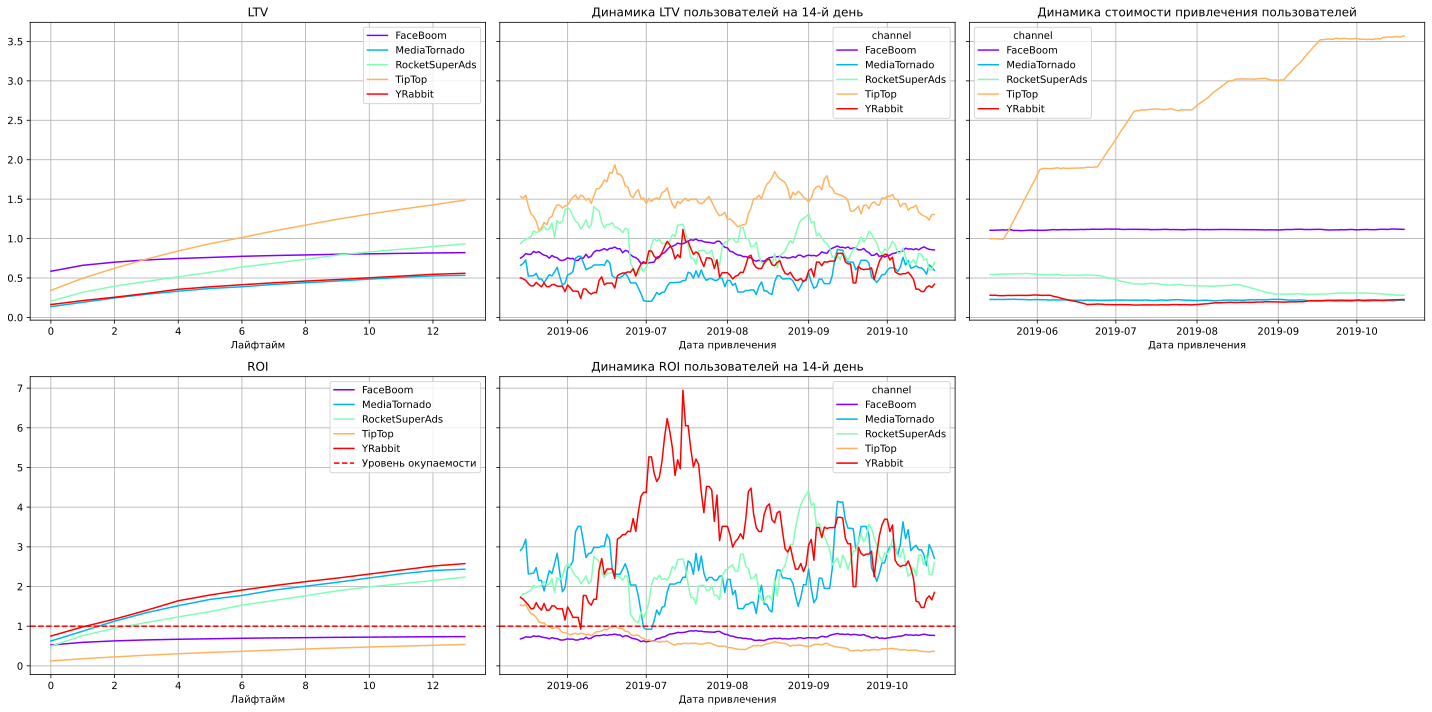

In [52]:
# подсчёт LTV и ROI с разбивкой по каналам привлечения для региона США
profiles_USA = profiles.query('region == "United States"')
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_USA, orders, observation_date, horizon_days, dimensions=dimensions, ignore_horizon=False
)
# построение графиков LTV, ROI и CAC
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

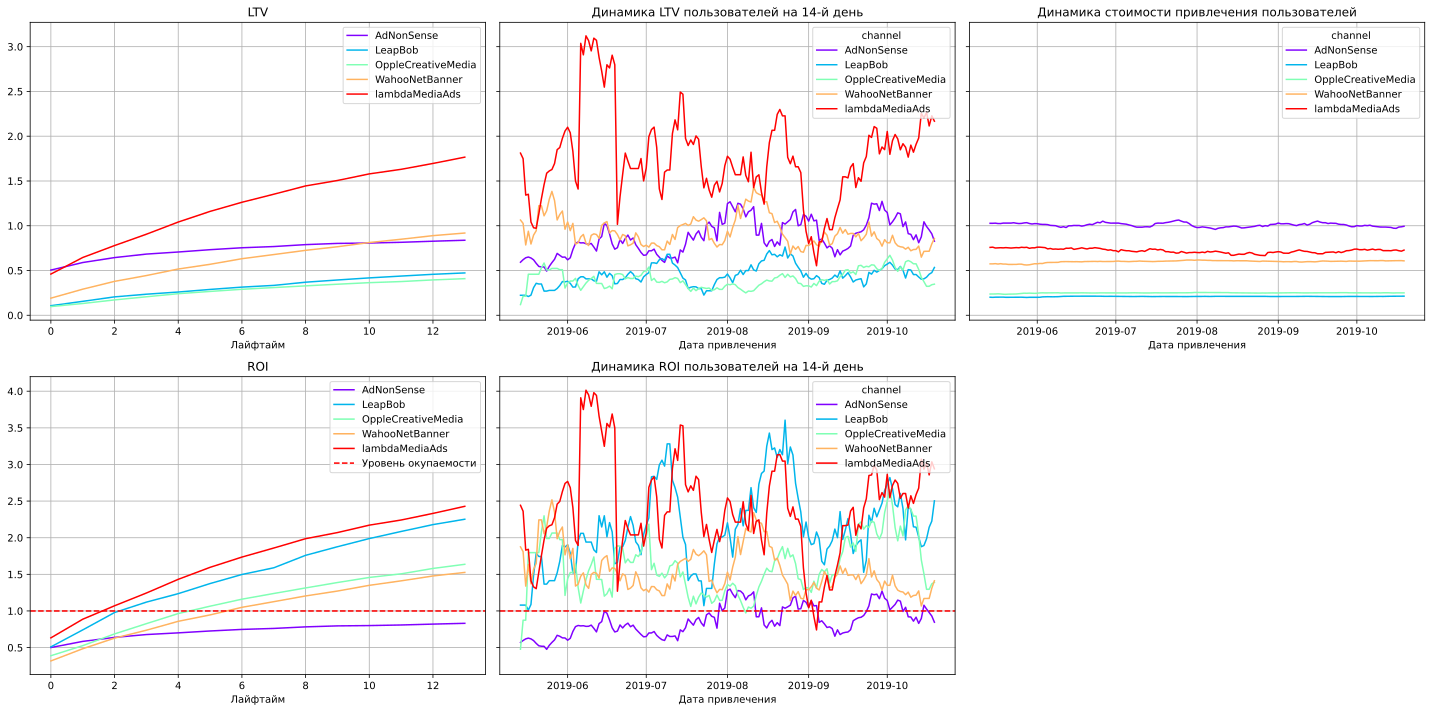

In [53]:
# подсчёт LTV и ROI с разбивкой по каналам привлечения для Европейского региона 
profiles_ES = profiles.query('region != "United States"')
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ES, orders, observation_date, horizon_days, dimensions=dimensions, ignore_horizon=False
)
# построение графиков LTV, ROI и CAC
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Проанализировав окупаемость рекламы в по каналам привлечения в регионах США и Европы - мы видим, что в разных регионах окупаются разные каналы. Так, в США окупаются MediaTornado, RocketSuperAds и YRabbit, в то время как в Европе это - lambdaMediaAds и LeapBob. 

#### Вывод

Мы проанализировали конверсию и удержание пользователей, окупаемость рекламы общую и в разбивке по каналам привлечения пользователей, регионам и используемым девайсам.

На графиках мы увидели, что самый высокий процент удержания пользователей по платформам у пользователей PC, в то время как самый низкий процент удержания у пользователей iPhone, что необычно, так как конверсия у пользователей PC - самая низкая. При этом в июле отметили пик показателей удержания пользователей на 14 день у пользователей PC и Mac. 

Мы так же отметили интересную закономерность, что у пользователей из региона с самой большой конверсией (США) - самое низкое удержание. То же самое и у каналов с наибольшей конверсией FaceBoom и AdNonSense, так же как и в случае с регионом, наблюдается наименьшее удержание.

Мы определили, что в целом реклама, направленная на привлечение пользователей, не окупается. При этом мы отметили, что инвестиции окупались на 14 день в мае и июне, затем график динамики окупаемости пользователей начал снижаться и перестал окупаться, соответственно переломный момент наступил в июне.

По графикам мы определили, что на окупаемость рекламы может негативно влиять слишком резко выросшая в июне стоимость привлечения одного пользователя на iOS платформах, в США, в каналах привлечения AdNonSense, FaceBoom и TipTop. Особенно хотелось бы отметить, что при этом платформы iOS, регион США, а так же каналы привлечения FaceBoom, TipTop и AdNonSense обладают наибольшей конверсией.

Исходя из анализа, мы можем порекомендовать перераспределить маркетинговые средства на более окупаемые потенциальные направления привлечения пользователей - точки роста. Например, перенаправить денежные средства с привлечения пользователей из США на остальные регионы присутствия - Франция, Великобритания, Германия, или поработать над улучшением показателя удержания для пользователей из США, так как они обладают наилучшей конверсией. Для этого можно мотивировать покупателей совершать новые покупки в приложении - продумать программу лояльности, кэшбэк или другие активности для уже платящих пользователей. 

Среди девайсов - рассмотреть увеличение бюджета на рекламу для пользователей PC - так как эта платформа обладает лучшим значением показателя удержания, а так же единственная окупается, но у этой платформы хромает конверсия. Соответственно необходимо продумать маркетинговые мероприятия для улучшения конверсии у пользователей этой платформы. 

Среди каналов привлечения мы рекомендуем попробовать перераспределить средства на разные самые окупаемые каналы внутри разных регионов, так как в США это MediaTornado, RocketSuperAds и YRabbit, в то время как в Европе это lambdaMediaAds и LeapBob. 

### Общий вывод

Мы проанализировали данные о пользователях, привлечённых в развлекательное приложение с 1 мая по 27 октября 2019 года - лог сервера с данными о посещениях, выгрузка покупок за исследуемый период, рекламные расходы.

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

Мы изучили:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

Первичный обзор данных показал, что перед исследованием данные требуют дополнительной подготовки, поэтому мы провели предобработку, а именно: 

1. Привели названия всех столбцов к единому стилю.
2. Изменили типы данных в столбцах с датами.

Пропуски и дубликаты в данных не были обнаружены. 

Мы получили пользовательские профили, определили минимальную и максимальную даты привлечения пользователей - 1 мая 2019 года и 27 октября 2019 года соответственно.

Исходя из анализа мы определили, что в приложение приходят пользователи из США, Германии, Великобритании и Франции. Больше всего платящих пользователей и самая большая их доля в США - около 7%. При этом, на долю платящих пользователей из США приходится почти 78% от всех платящих пользователей приложения, в то время как на Германию, Великобританию и Францию всего по 7%.

Мы определили, что приложение доступно для использования на платформах Mac, iPhone, Android и PC. Наибольшая доля - по чуть более 6% платящих пользователей, совершают покупки с apple устройств - Mac и iPhone. Меньше всего доля платящих пользователей на платформе PC - всего 5%. При этом если анализировать общее количество платящих пользователей в приложении, то больше всего покупок было совершено с iPhone - 38%, а на втором месте с Andriod - 23%. Таким образом, мы можем сделать вывод о том, что несмотря на наибольшую долю платящих пользователей с платформы Mac - более половины покупок совершается с мобильных устройств.

У приложения большое множество каналов привлечения пользователей. Наибольшая доля платящих пользователей у платформы Faceboom - 12%, на втором месте канал AdNonSense - 11% и на третьем месте канал lambdaMediaAds - 10%. 

Мы провели анализ затрат на маркетинг и определили, что общая сумма расходов на маркетинг за анализируемый период составила 105497 долларов, при этом затраты за исследуемый период не окупаются.

Мы определили, что в целом реклама, направленная на привлечение пользователей, не окупается. 

Исходя из анализа мы определили следующие проблемы:

1) Реклама в США не окупается, так как стоимость привлечения одного пользователя у самого популярного канала кратно растет в течение всего исследуемого периода. При этом мы отмечаем высокий уровень конверсии, но низкий уровень удержания пользователей из США.

2) Каналы с наибольшей конверсией - FaceBoom и AdNonSense обладают наименьшим уровнем удержания. 

3) Кратный рост САС канала TipTop негативно влияет на окупаемость рекламы в самом большом регионе присутствия - США.

4) Платформа PC единственная оккупается, обладает наибольшим показателем удержания, но наименьшей конверсией.

Таким образом, мы можем рекомендовать:

1) Перераспределить маркетинговые средства на более окупаемые потенциальные направления привлечения пользователей Например, из США на остальные регионы присутствия - Франция, Великобритания, Германия, или поработать над улучшением показателя удержания для пользователей из США, так как они обладают наилучшей конверсией. Для этого можно мотивировать покупателей совершать новые покупки в приложении - продумать программу лояльности, кэшбэк или другие активности для уже платящих пользователей. 

2) Среди девайсов - рассмотреть увеличение бюджета на рекламу для пользователей PC - так как эта платформа обладает лучшим значением показателя удержания, а так же единственная окупается, но у этой платформы хромает конверсия. Соответственно необходимо продумать маркетинговые мероприятия для улучшения конверсии у пользователей этой платформы. 

3) Среди каналов привлечения мы рекомендуем перераспределить средства на самые окупаемые каналы внутри разных регионов, так в США это MediaTornado, RocketSuperAds и YRabbit, в то время как в Европе это lambdaMediaAds и LeapBob. 

4) Провести мероприятия по улучшению показателя удержания у каналов FaceBoom и AdNonSense.